In [22]:
Brainwave-Controlled Wheelchair

Loading ECG sample from: ecg_sample.csv
Loaded 2500 samples. Sampling rate = 250 Hz


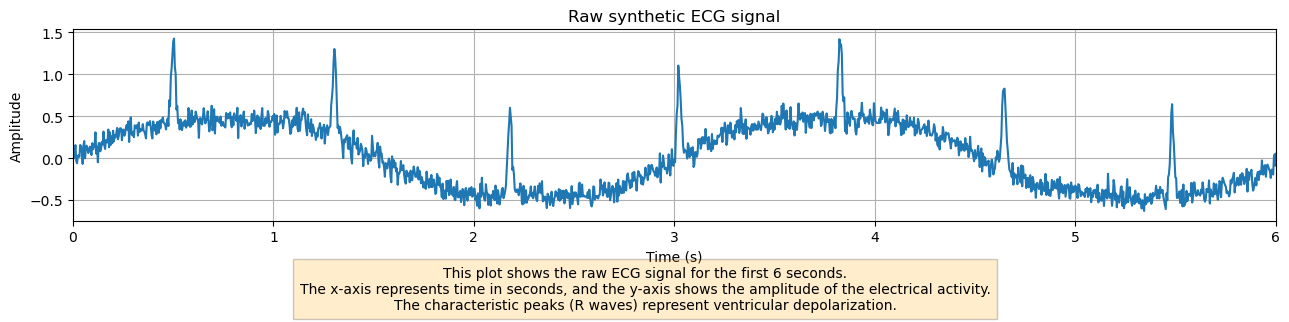

In [39]:
# Plot raw ECG (first 6 seconds)
%matplotlib inline
plt.figure(figsize=(13,3))
plt.plot(df['time'], df['ecg'])
plt.title('Raw synthetic ECG signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, 6)
plt.grid(True)

# Add text annotation explaining the raw data
plt.figtext(0.5, -0.1, 
            "This plot shows the raw ECG signal for the first 6 seconds.\n"
            "The x-axis represents time in seconds, and the y-axis shows the amplitude of the electrical activity.\n"
            "The characteristic peaks (R waves) represent ventricular depolarization.",
            ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the explanation text
plt.show()

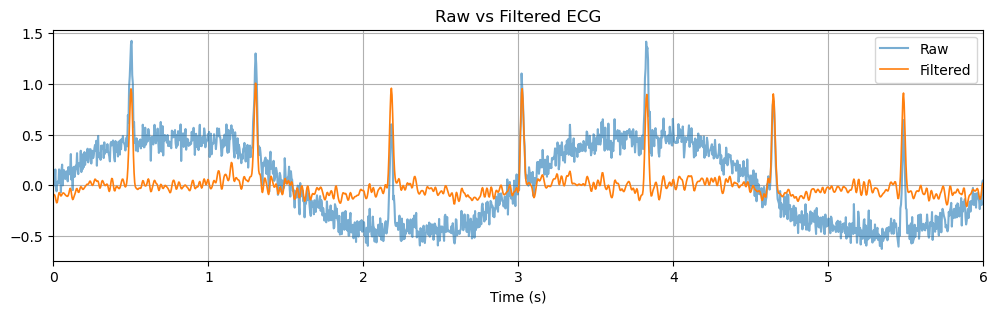

In [40]:

import numpy as np
from scipy import signal


def bandpass_filter(data, fs, lowcut, highcut, order=3):
    
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data

raw = df['ecg'].values
filtered = bandpass_filter(raw, fs=fs, lowcut=0.5, highcut=40.0, order=3)

plt.figure(figsize=(12,3))
plt.plot(df['time'], raw, label='Raw', alpha=0.6)
plt.plot(df['time'], filtered, label='Filtered', linewidth=1.2)
plt.title('Raw vs Filtered ECG')
plt.xlabel('Time (s)')
plt.xlim(0,6)
plt.legend()
plt.grid(True)
plt.show()

Detected peaks: 21


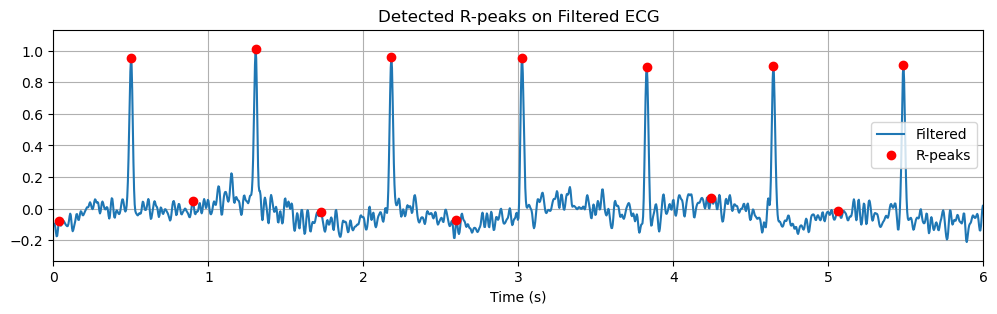

Average BPM = 129.1
Interpretation: Tachycardia (fast heart rate)


In [41]:

def detect_r_peaks(signal, fs, distance_sec=0.4, height=None):
    from scipy.signal import find_peaks
  
    distance_samples = int(distance_sec * fs)
    peaks, properties = find_peaks(signal, distance=distance_samples, height=height)
    
    return peaks, properties

def compute_bpm_from_peaks(peaks, fs):
    import numpy as np
    rr_intervals = np.diff(peaks) / fs
    inst_bpm = 60 / rr_intervals
    
    # Calculate average BPM
    avg_bpm = np.mean(inst_bpm)
    
    return rr_intervals, inst_bpm, avg_bpm

def interpret_bpm(bpm):
    # Simple BPM interpretation
    if bpm < 60:
        return "Bradycardia (slow heart rate)"
    elif bpm > 100:
        return "Tachycardia (fast heart rate)"
    else:
        return "Normal heart rate"

# Now use these functions
peaks, props = detect_r_peaks(filtered, fs=fs, distance_sec=0.4, height=None)
print('Detected peaks:', len(peaks))

plt.figure(figsize=(12,3))
plt.plot(df['time'], filtered, label='Filtered')
plt.plot(df['time'].iloc[peaks], filtered[peaks], 'ro', label='R-peaks')
plt.title('Detected R-peaks on Filtered ECG')
plt.xlabel('Time (s)')
plt.xlim(0,6)
plt.legend()
plt.grid(True)
plt.show()

# Compute BPM
rr_intervals, inst_bpm, avg_bpm = compute_bpm_from_peaks(peaks, fs)
print('Average BPM = {:.1f}'.format(avg_bpm))
print('Interpretation:', interpret_bpm(avg_bpm))

In [42]:
# Save a final plot to output/

import matplotlib.pyplot as plt
import os
from pathlib import Path

matplotlib.use('Agg')
plt.figure(figsize=(10,3))
plt.plot(df['time'], filtered, label='Filtered')
plt.plot(df['time'].iloc[peaks], filtered[peaks], 'ro', label='R-peaks')
plt.title(f'Filtered ECG with R-peaks - avg BPM = {avg_bpm:.1f}')
plt.xlabel('Time (s)')
plt.xlim(0,10)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Create the output directory if it doesn't exist
OUT = BASE / 'output' / 'final_plot.png'
os.makedirs(OUT.parent, exist_ok=True)  # Create the directory if it doesn't exist

plt.savefig(OUT)
print('Saved final plot to', OUT)

Saved final plot to \mnt\data\heart_rate_analyzer\output\final_plot.png
